In [1]:
import numpy as np
# use pandas data frame to process data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

C:\Users\saijal\AppData\Local\Temp\ipykernel_13196\1760017860.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Data collection & Analysis

In [2]:
# loading the data from csv file to a Pandas dataframe
insurance_data=pd.read_csv("insurance.csv")

In [3]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# getting some info about dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# getting size,#row nd #cols
insurance_data.shape

(1338, 7)

Categorical features:
<!-- that has a class of its value not holding numerical values -->
Smoker
Sex
Region

In [7]:
insurance_data.describe()
# 25% people below the age 27,50% below 39 nd 75% below 51

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

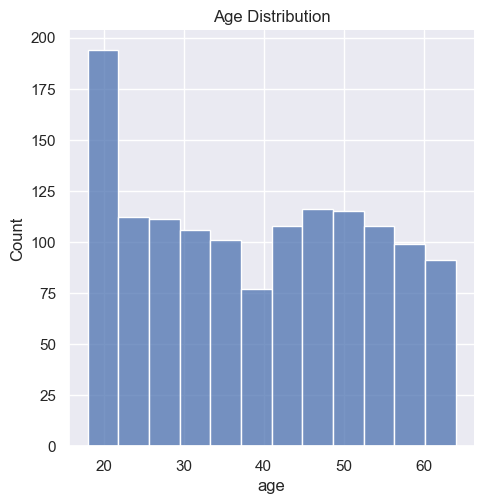

In [8]:
# distribution of age value
sns.set_theme()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()

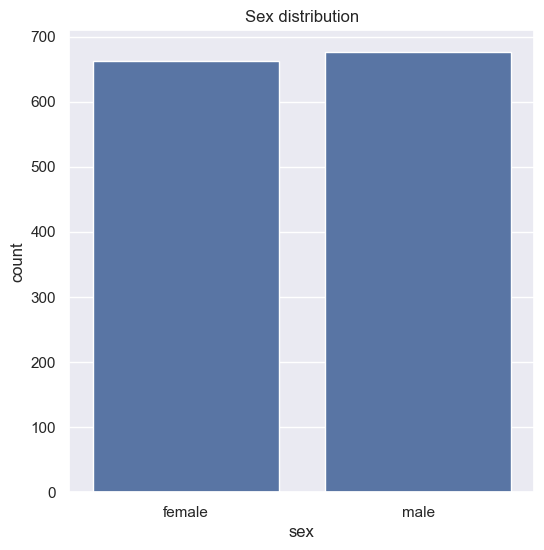

In [9]:

plt.figure(figsize=(6,6))
# we need to show count of no. of males and females which shows by countplot where x-axis has name sex
sns.countplot(x='sex',data=insurance_data)
plt.title("Sex distribution")
plt.show()

In [10]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

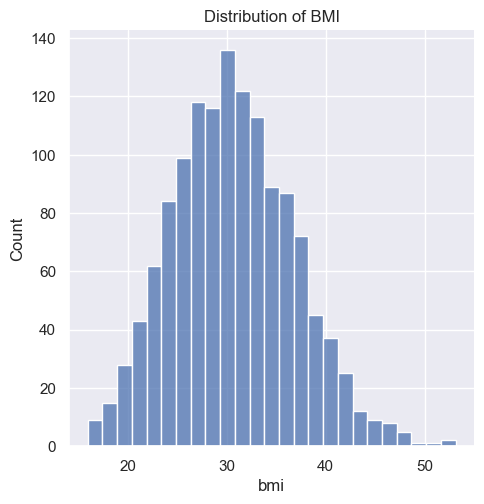

In [11]:
plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'])
plt.title("Distribution of BMI")
plt.show()

Normal BMI range-18.5 to 24.9
here most of the people have BMI above 25, so more people are overweight which can lead to high cost

<Figure size 600x600 with 0 Axes>

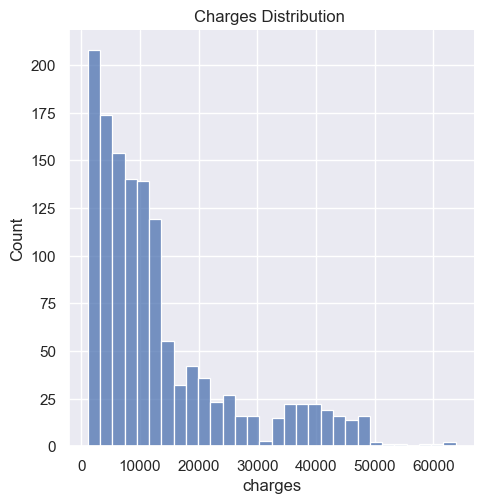

In [12]:
plt.figure(figsize=(6,6))
sns.displot(insurance_data['charges'])
plt.title("Charges Distribution ")
plt.show()

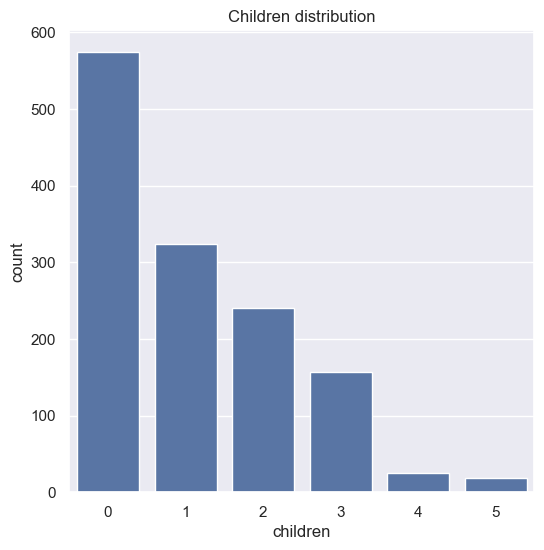

In [13]:

plt.figure(figsize=(6,6))
# we need to show count of no. of males and females which shows by countplot where x-axis has name sex
sns.countplot(x='children',data=insurance_data)
plt.title("Children distribution")
plt.show()

In [14]:
insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

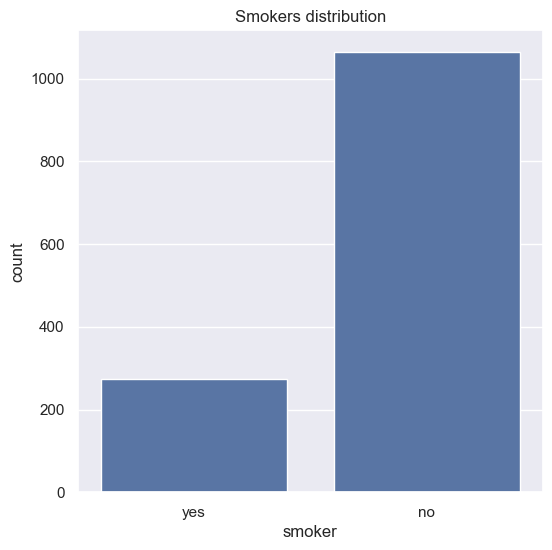

In [15]:

plt.figure(figsize=(6,6))
# we need to show count of no. of males and females which shows by countplot where x-axis has name sex
sns.countplot(x='smoker',data=insurance_data)
plt.title("Smokers distribution")
plt.show()

In [16]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

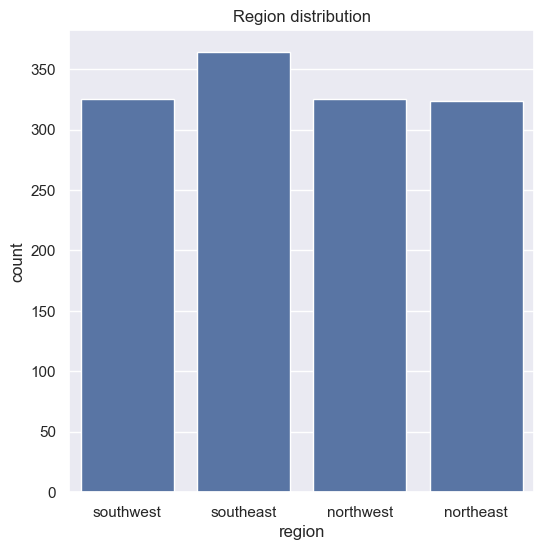

In [17]:

plt.figure(figsize=(6,6))
# we need to show count of no. of males and females which shows by countplot where x-axis has name sex
sns.countplot(x='region',data=insurance_data)
plt.title("Region distribution")
plt.show()

In [18]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Data Preprocessing

Encoding the categorical features(so that machine can understand)

In [20]:
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_data.replace({'smoker':{'no':0,'yes':1}},inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

Splitting the features and target

In [21]:
# axis=1 used to drop column, 0 used to drop row
X=insurance_data.drop(columns='charges',axis=1)
Y=insurance_data['charges']

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [23]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the training nd testing data

In [24]:
# we make testing data of size 20%, rest will go for training
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [27]:
regressor=LinearRegression()

In [28]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [29]:
training_data_prediction=regressor.predict(X_train)

In [31]:
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R2 squared value is: ',r2_train)

R2 squared value is:  0.7518195459072954


In [32]:
testing_data_prediction=regressor.predict(X_test)

In [33]:
r2_test=metrics.r2_score(Y_test,testing_data_prediction)
print('R2 squared value is: ',r2_test)

R2 squared value is:  0.7454471618659975


Building a Predictive system

In [38]:
input_data=(25,0,26.22,0,0,3)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
predicted_value=regressor.predict(input_data_reshaped)
print("The insurance cost is: USD",predicted_value)

The insurance cost is: USD [3117.87459435]


C:\Users\saijal\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
